In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

In [2]:
train = pd.read_excel('Data_Train_restro.xlsx')
test = pd.read_excel('Data_Test_restro.xlsx')

In [3]:
train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [4]:
train.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

In [5]:
train.dtypes

TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
COST              int64
dtype: object

In [6]:
train.shape

(12690, 9)

In [7]:
test.shape

(4231, 8)

In [8]:
train.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

In [9]:
test.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

In [10]:
train["CUISINES"].value_counts()

South Indian                                                           532
North Indian                                                           526
North Indian, Chinese                                                  501
Fast Food                                                              286
Chinese                                                                167
                                                                      ... 
Chettinad, Chinese, Biryani                                              1
Biryani, Chinese, Seafood                                                1
Continental, Burger, Italian, Sandwich, Beverages                        1
South Indian, Sri Lankan, Chinese                                        1
Street Food, Chinese, Continental, North Indian, Finger Food, Pizza      1
Name: CUISINES, Length: 4155, dtype: int64

In [11]:
train["TITLE"].value_counts()

QUICK BITES                  4218
CASUAL DINING                3652
None                         1003
CAFÉ                          607
DESSERT PARLOR                382
                             ... 
KIOSK,FOOD COURT                1
CONFECTIONERY,QUICK BITES       1
SWEET SHOP,BEVERAGE SHOP        1
BAKERY,BEVERAGE SHOP            1
CASUAL DINING,FOOD COURT        1
Name: TITLE, Length: 113, dtype: int64

In [12]:
train["CITY"].unique()

array(['Thane', 'Chennai', 'Mumbai', 'Bangalore', 'Gurgaon', 'Hyderabad',
       'Kochi', 'Thane West', 'Andheri Lokhandwala', 'New Delhi',
       'Andheri West', 'Malad East', '682036', 'Bangalor', 'Navi Mumbai',
       'Bandra West', 'Delhi', 'Noida', 'Bangalore-560066',
       'Secunderabad', nan, 'India', 'Madhuranagar', 'Chennai Teynampet',
       'Faridabad', 'Chembur.', 'Maharashtra', 'opp gurudwara Shakurpur',
       'Telagana Land Line:040-48507016', 'Ghaziabad', 'Karnataka',
       'Kerala', 'Edappally', 'Kadavanthra', 'Ernakulam Circle kochi',
       'Bengalore', 'Near Reliance Fresh', 'Kilpauk', 'Bengaluru',
       'Kothaguda', 'Goregaon West', 'Banglore', 'Tamil Nadu', 'Kakkanad',
       'Kochi Elamkulam', 'Outer Ring Road', 'Mulund East',
       'Secunderabad main road near signal NMREC COLLEGE', 'Telangana',
       'Ponnuruni Kochi', 'Gachibowli', 'Semmancheri',
       '5th Main Teachers Colony Koramangala Block 1 Bangalore 560034',
       'Mumbai Mahim', 'Powai (Next to

In [13]:
train.CUISINES.str.split(',')

0                          [Malwani,  Goan,  North Indian]
1                       [Asian,  Modern Indian,  Japanese]
2          [North Indian,  Chinese,  Biryani,  Hyderabadi]
3                                      [Tibetan,  Chinese]
4                                               [Desserts]
                               ...                        
12685                      [North Indian,  Burger,  Kebab]
12686                                 [Goan,  Continental]
12687        [Finger Food,  Continental,  Asian,  Chinese]
12688    [North Indian,  South Indian,  Chinese,  Stree...
12689                             [North Indian,  Chinese]
Name: CUISINES, Length: 12690, dtype: object

In [14]:
test['RATING'] = pd.to_numeric(test['RATING'],errors='coerce')
train['RATING'] = pd.to_numeric(train['RATING'],errors='coerce')

In [15]:
train[['VOTES','R']]= train.VOTES.str.split(expand=True)
test[['VOTES','R']]= test.VOTES.str.split(expand=True)

In [16]:
train

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,R
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49,1200,votes
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30,1500,votes
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221,800,votes
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24,800,votes
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165,300,votes
...,...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546,500,votes
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214,1800,votes
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608,1300,votes
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32,400,votes


In [17]:
train.drop('R',axis=1,inplace=True)
test.drop('R',axis=1,inplace=True)

In [18]:
test['VOTES'] = pd.to_numeric(test['VOTES'],errors='coerce')
train['VOTES'] = pd.to_numeric(train['VOTES'],errors='coerce')

In [19]:
train.dtypes

TITLE             object
RESTAURANT_ID      int64
CUISINES          object
TIME              object
CITY              object
LOCALITY          object
RATING           float64
VOTES            float64
COST               int64
dtype: object

In [20]:
train['Cuisine1'] = train['CUISINES'].str.split(',').str[0]   #dividing cuisines into 6 differen columns in both test and train 
train['Cuisine2'] = train['CUISINES'].str.split(',').str[1]
train['Cuisine3'] = train['CUISINES'].str.split(',').str[2]
train['Cuisine4'] = train['CUISINES'].str.split(',').str[3]
train['Cuisine5'] = train['CUISINES'].str.split(',').str[4]
train['Cuisine6'] = train['CUISINES'].str.split(',').str[5]

test['Cuisine1'] = test['CUISINES'].str.split(',').str[0]
test['Cuisine2'] = test['CUISINES'].str.split(',').str[1]
test['Cuisine3'] = test['CUISINES'].str.split(',').str[2]
test['Cuisine4'] = test['CUISINES'].str.split(',').str[3]
test['Cuisine5'] = test['CUISINES'].str.split(',').str[4]
test['Cuisine6'] = test['CUISINES'].str.split(',').str[5]

In [21]:
train

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,Cuisine1,Cuisine2,Cuisine3,Cuisine4,Cuisine5,Cuisine6
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200,Malwani,Goan,North Indian,NaN,NaN,NaN
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500,Asian,Modern Indian,Japanese,NaN,NaN,NaN
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221.0,800,North Indian,Chinese,Biryani,Hyderabadi,NaN,NaN
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24.0,800,Tibetan,Chinese,NaN,NaN,NaN,NaN
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165.0,300,Desserts,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546.0,500,North Indian,Burger,Kebab,NaN,NaN,NaN
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214.0,1800,Goan,Continental,NaN,NaN,NaN,NaN
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608.0,1300,Finger Food,Continental,Asian,Chinese,NaN,NaN
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32.0,400,North Indian,South Indian,Chinese,Street Food,NaN,NaN


In [22]:
test

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,Cuisine1,Cuisine2,Cuisine3,Cuisine4,Cuisine5,Cuisine6
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564.0,North Indian,Chinese,Mughlai,Kebab,NaN,NaN
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61.0,South Indian,Fast Food,Pizza,North Indian,NaN,NaN
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350.0,North Indian,Seafood,Biryani,Chinese,NaN,NaN
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445.0,Biryani,NaN,NaN,NaN,NaN,NaN
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23.0,South Indian,Kerala,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287.0,North Indian,Mughlai,Chinese,NaN,NaN,NaN
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469.0,Biryani,North Indian,Sandwich,Salad,Wraps,NaN
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53.0,Continental,North Indian,NaN,NaN,NaN,NaN
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,NaN,NaN,Rolls,Beverages,NaN,NaN,NaN,NaN


In [23]:
train.drop(['CUISINES','RESTAURANT_ID','VOTES'],axis=1,inplace = True)
test.drop(['CUISINES','RESTAURANT_ID','VOTES'],axis=1,inplace = True)

In [24]:
train['Cuisine2'].fillna('none',inplace=True)
test['Cuisine2'].fillna('none',inplace=True)
train['Cuisine3'].fillna('none',inplace=True)
test['Cuisine3'].fillna('none',inplace=True)
train['Cuisine4'].fillna('none',inplace=True)
test['Cuisine4'].fillna('none',inplace=True)
train['Cuisine5'].fillna('none',inplace=True)
test['Cuisine5'].fillna('none',inplace=True)
train['Cuisine6'].fillna('none',inplace=True)
test['Cuisine6'].fillna('none',inplace=True)

In [25]:
test.isnull().sum()

TITLE         0
TIME          0
CITY         35
LOCALITY     30
RATING      402
Cuisine1      0
Cuisine2      0
Cuisine3      0
Cuisine4      0
Cuisine5      0
Cuisine6      0
dtype: int64

In [26]:
train.isnull().sum()

TITLE          0
TIME           0
CITY         112
LOCALITY      98
RATING      1204
COST           0
Cuisine1       0
Cuisine2       0
Cuisine3       0
Cuisine4       0
Cuisine5       0
Cuisine6       0
dtype: int64

In [27]:
train.dropna(inplace=True)
test.dropna(inplace=True)   # since it is a huge dataset dropping nan wouldnt effect

In [28]:
train.shape

(11393, 12)

In [29]:
test.shape

(3797, 11)

In [30]:
test.columns

Index(['TITLE', 'TIME', 'CITY', 'LOCALITY', 'RATING', 'Cuisine1', 'Cuisine2',
       'Cuisine3', 'Cuisine4', 'Cuisine5', 'Cuisine6'],
      dtype='object')

In [31]:
encode=['TITLE', 'TIME', 'CITY', 'LOCALITY', 'RATING', 'Cuisine1', 'Cuisine2',
       'Cuisine3', 'Cuisine4', 'Cuisine5', 'Cuisine6']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in encode:
    train[i]=le.fit_transform(train[i].astype(str))
    test[i]=le.fit_transform(test[i].astype(str))

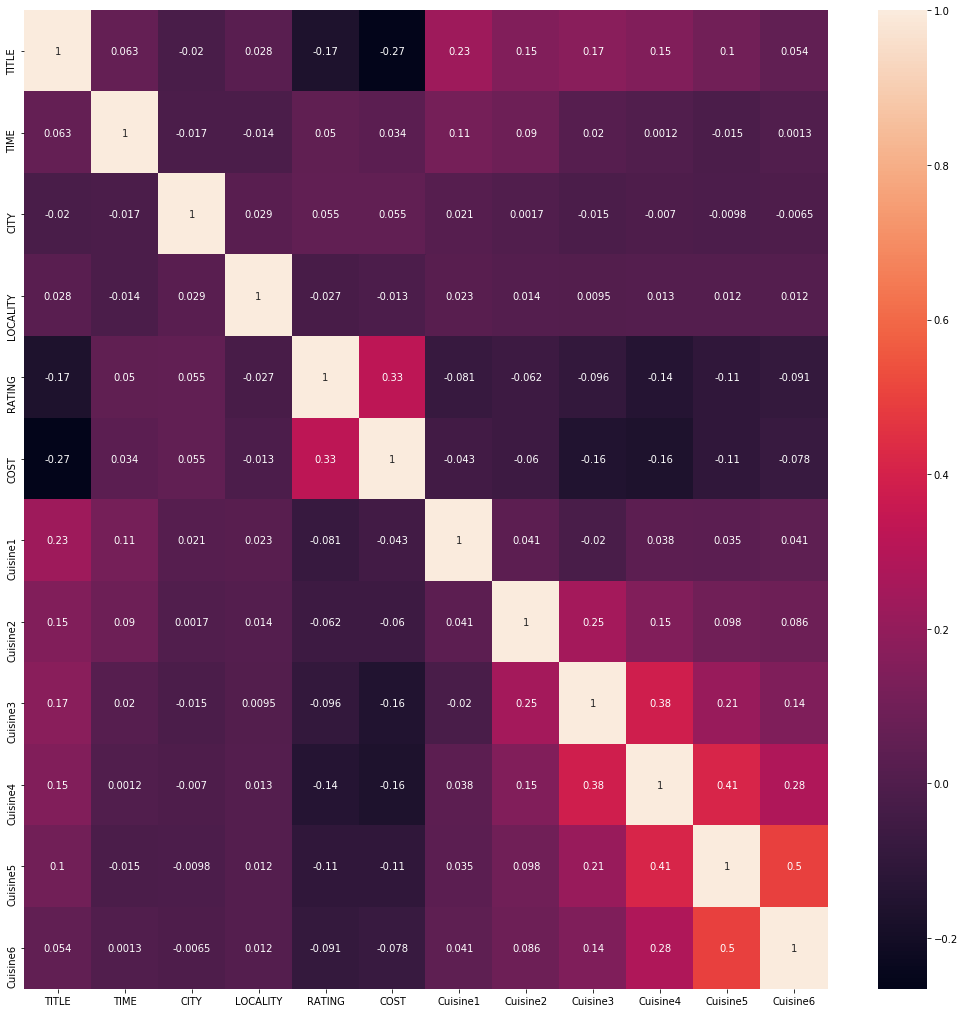

In [32]:
plt.figure(figsize=(18,18))
sns.heatmap(train.corr(),annot= True)   # not much correlaton among varaibles observed
plt.show()

In [33]:
x = train.drop(['COST'],axis=1)
y = train["COST"]
df_x = train.drop(["COST"],axis=1)

In [34]:
x.skew()

TITLE       0.005770
TIME        0.306350
CITY        0.294861
LOCALITY    0.335364
RATING     -0.517737
Cuisine1    0.027389
Cuisine2    0.076566
Cuisine3   -0.766909
Cuisine4   -2.032791
Cuisine5   -3.970272
Cuisine6   -6.578869
dtype: float64

In [35]:
y.shape

(11393,)

In [36]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
x = pt.fit_transform(x)  
x = pd.DataFrame(x,columns=df_x.columns)
x

,TITLE,TIME,CITY,LOCALITY,RATING,Cuisine1,Cuisine2,Cuisine3,Cuisine4,Cuisine5,Cuisine6
0,-0.797665,-0.433668,1.699942,-0.868898,-0.514103,0.433784,-0.607937,-0.181097,0.512632,0.300403,0.189571
1,-0.724802,0.965995,-0.796061,0.967959,1.018506,-1.752809,0.284711,-0.968325,0.512632,0.300403,0.189571
2,-0.797665,-0.560886,-0.796061,1.077396,-0.035243,0.802705,-0.958541,-1.661527,-2.177852,0.300403,0.189571
3,1.074850,-1.299559,0.949368,-1.480071,0.743437,1.586702,-0.958541,0.809298,0.512632,0.300403,0.189571
4,-0.158817,-0.633224,0.949368,0.075021,-0.035243,-0.635868,1.230412,0.809298,0.512632,0.300403,0.189571
...,...,...,...,...,...,...,...,...,...,...,...
11388,1.074850,0.136487,0.111328,-0.685131,-0.035243,0.802705,-1.223630,-0.881606,0.512632,0.300403,0.189571
11389,-0.724802,0.178511,0.949368,-1.496094,1.301111,-0.322376,-0.876478,0.809298,0.512632,0.300403,0.189571
11390,0.451678,0.127222,1.098468,1.508070,0.476029,-0.436763,-0.876478,-1.785845,-2.248073,0.300403,0.189571
11391,-0.797665,0.918052,-0.796061,0.103726,-0.740950,0.802705,0.918441,-1.479404,-0.435304,0.300403,0.189571


In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge
ls = Lasso()
parameters = {"alpha":[0.0001,0.001,0.01,0.1]}
clf= GridSearchCV(ls,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.1}

In [38]:
rg = Ridge()
parameters = {"alpha":[0.0001,0.001,0.01,0.1]}
clfr= GridSearchCV(rg,parameters,cv=10)
clfr.fit(x,y)
clfr.best_params_

{'alpha': 0.1}

In [39]:
from sklearn.neighbors import KNeighborsRegressor
neighbors={'n_neighbors':range(1,20)}
knr = KNeighborsRegressor()
gknr = GridSearchCV(knr,neighbors,cv=5)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 13}

In [40]:
lr = LinearRegression()
ls=Lasso(alpha=0.1)
rg = Ridge(alpha=0.1)
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
knr= KNeighborsRegressor(n_neighbors=13)

In [41]:
def maxr2_score(regr,x,y):
    max_r_score = 0 
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=r_state)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr = r2_score(y_test,y_pred)
        print("r2 score corresponding to ",r_state,"is",r2_score)
        if r2_scr>max_r_score:
            max_r_score = r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state,"is",max_r_score)
    return final_r_state

In [42]:
r_state= maxr2_score(lr,x,y)

r2 score corresponding to  42 is <function r2_score at 0x0000020FF23ADA68>
r2 score corresponding to  43 is <function r2_score at 0x0000020FF23ADA68>
r2 score corresponding to  44 is <function r2_score at 0x0000020FF23ADA68>
r2 score corresponding to  45 is <function r2_score at 0x0000020FF23ADA68>
r2 score corresponding to  46 is <function r2_score at 0x0000020FF23ADA68>
r2 score corresponding to  47 is <function r2_score at 0x0000020FF23ADA68>
r2 score corresponding to  48 is <function r2_score at 0x0000020FF23ADA68>
r2 score corresponding to  49 is <function r2_score at 0x0000020FF23ADA68>
r2 score corresponding to  50 is <function r2_score at 0x0000020FF23ADA68>
r2 score corresponding to  51 is <function r2_score at 0x0000020FF23ADA68>
r2 score corresponding to  52 is <function r2_score at 0x0000020FF23ADA68>
r2 score corresponding to  53 is <function r2_score at 0x0000020FF23ADA68>
r2 score corresponding to  54 is <function r2_score at 0x0000020FF23ADA68>
r2 score corresponding to

In [43]:
r_state= maxr2_score(rg,x,y)

r2 score corresponding to  42 is <function r2_score at 0x0000020FF23ADA68>
r2 score corresponding to  43 is <function r2_score at 0x0000020FF23ADA68>
r2 score corresponding to  44 is <function r2_score at 0x0000020FF23ADA68>
r2 score corresponding to  45 is <function r2_score at 0x0000020FF23ADA68>
r2 score corresponding to  46 is <function r2_score at 0x0000020FF23ADA68>
r2 score corresponding to  47 is <function r2_score at 0x0000020FF23ADA68>
r2 score corresponding to  48 is <function r2_score at 0x0000020FF23ADA68>
r2 score corresponding to  49 is <function r2_score at 0x0000020FF23ADA68>
r2 score corresponding to  50 is <function r2_score at 0x0000020FF23ADA68>
r2 score corresponding to  51 is <function r2_score at 0x0000020FF23ADA68>
r2 score corresponding to  52 is <function r2_score at 0x0000020FF23ADA68>
r2 score corresponding to  53 is <function r2_score at 0x0000020FF23ADA68>
r2 score corresponding to  54 is <function r2_score at 0x0000020FF23ADA68>
r2 score corresponding to

In [44]:
r_state= maxr2_score(knr,x,y)

r2 score corresponding to  42 is <function r2_score at 0x0000020FF23ADA68>
r2 score corresponding to  43 is <function r2_score at 0x0000020FF23ADA68>
r2 score corresponding to  44 is <function r2_score at 0x0000020FF23ADA68>
r2 score corresponding to  45 is <function r2_score at 0x0000020FF23ADA68>
r2 score corresponding to  46 is <function r2_score at 0x0000020FF23ADA68>
r2 score corresponding to  47 is <function r2_score at 0x0000020FF23ADA68>
r2 score corresponding to  48 is <function r2_score at 0x0000020FF23ADA68>
r2 score corresponding to  49 is <function r2_score at 0x0000020FF23ADA68>
r2 score corresponding to  50 is <function r2_score at 0x0000020FF23ADA68>
r2 score corresponding to  51 is <function r2_score at 0x0000020FF23ADA68>
r2 score corresponding to  52 is <function r2_score at 0x0000020FF23ADA68>
r2 score corresponding to  53 is <function r2_score at 0x0000020FF23ADA68>
r2 score corresponding to  54 is <function r2_score at 0x0000020FF23ADA68>
r2 score corresponding to

In [45]:
from sklearn.ensemble import GradientBoostingRegressor
import warnings 
warnings.filterwarnings("ignore")
gbr = GradientBoostingRegressor()
parameters = {"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[50,100,150,200,250]}
clft = GridSearchCV(gbr,parameters,cv=5)
clft.fit(x,y)
clft.best_params_

{'learning_rate': 0.1, 'n_estimators': 250}

In [46]:
gbr = GradientBoostingRegressor(learning_rate=0.1,n_estimators=250)
r_state= maxr2_score(gbr,x,y)

r2 score corresponding to  42 is <function r2_score at 0x0000020FF23ADA68>
r2 score corresponding to  43 is <function r2_score at 0x0000020FF23ADA68>
r2 score corresponding to  44 is <function r2_score at 0x0000020FF23ADA68>
r2 score corresponding to  45 is <function r2_score at 0x0000020FF23ADA68>
r2 score corresponding to  46 is <function r2_score at 0x0000020FF23ADA68>
r2 score corresponding to  47 is <function r2_score at 0x0000020FF23ADA68>
r2 score corresponding to  48 is <function r2_score at 0x0000020FF23ADA68>
r2 score corresponding to  49 is <function r2_score at 0x0000020FF23ADA68>
r2 score corresponding to  50 is <function r2_score at 0x0000020FF23ADA68>
r2 score corresponding to  51 is <function r2_score at 0x0000020FF23ADA68>
r2 score corresponding to  52 is <function r2_score at 0x0000020FF23ADA68>
r2 score corresponding to  53 is <function r2_score at 0x0000020FF23ADA68>
r2 score corresponding to  54 is <function r2_score at 0x0000020FF23ADA68>
r2 score corresponding to

In [47]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
ada = AdaBoostRegressor()
parameters = {"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[50,100,150,200,250],"base_estimator":[lr,ls,dt]}
fd = GridSearchCV(ada,parameters,cv=5)
fd.fit(x,y)
fd.best_params_

{'base_estimator': DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'),
 'learning_rate': 0.001,
 'n_estimators': 250}

In [49]:
ada = AdaBoostRegressor(base_estimator=dt,learning_rate=0.001,n_estimators=250)
r_state= maxr2_score(ada,x,y)

r2 score corresponding to  42 is <function r2_score at 0x0000020FF23ADA68>
r2 score corresponding to  43 is <function r2_score at 0x0000020FF23ADA68>
r2 score corresponding to  44 is <function r2_score at 0x0000020FF23ADA68>
r2 score corresponding to  45 is <function r2_score at 0x0000020FF23ADA68>
r2 score corresponding to  46 is <function r2_score at 0x0000020FF23ADA68>
r2 score corresponding to  47 is <function r2_score at 0x0000020FF23ADA68>
r2 score corresponding to  48 is <function r2_score at 0x0000020FF23ADA68>
r2 score corresponding to  49 is <function r2_score at 0x0000020FF23ADA68>
r2 score corresponding to  50 is <function r2_score at 0x0000020FF23ADA68>
r2 score corresponding to  51 is <function r2_score at 0x0000020FF23ADA68>
r2 score corresponding to  52 is <function r2_score at 0x0000020FF23ADA68>
r2 score corresponding to  53 is <function r2_score at 0x0000020FF23ADA68>
r2 score corresponding to  54 is <function r2_score at 0x0000020FF23ADA68>
r2 score corresponding to

In [50]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
parameters = {"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[50,100,150,200,250]}
fd = GridSearchCV(xgb,parameters,cv=5)
fd.fit(x,y)
fd.best_params_

{'learning_rate': 0.1, 'n_estimators': 200}

In [51]:
xgb = XGBRegressor(learning_rate=0.1,n_estimators=200)
r_state= maxr2_score(xgb,x,y)

r2 score corresponding to  42 is <function r2_score at 0x0000020FF23ADA68>
r2 score corresponding to  43 is <function r2_score at 0x0000020FF23ADA68>
r2 score corresponding to  44 is <function r2_score at 0x0000020FF23ADA68>
r2 score corresponding to  45 is <function r2_score at 0x0000020FF23ADA68>
r2 score corresponding to  46 is <function r2_score at 0x0000020FF23ADA68>
r2 score corresponding to  47 is <function r2_score at 0x0000020FF23ADA68>
r2 score corresponding to  48 is <function r2_score at 0x0000020FF23ADA68>
r2 score corresponding to  49 is <function r2_score at 0x0000020FF23ADA68>
r2 score corresponding to  50 is <function r2_score at 0x0000020FF23ADA68>
r2 score corresponding to  51 is <function r2_score at 0x0000020FF23ADA68>
r2 score corresponding to  52 is <function r2_score at 0x0000020FF23ADA68>
r2 score corresponding to  53 is <function r2_score at 0x0000020FF23ADA68>
r2 score corresponding to  54 is <function r2_score at 0x0000020FF23ADA68>
r2 score corresponding to

In [52]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=89 ,test_size=0.33)
xgb = XGBRegressor(learning_rate=0.1,n_estimators=200)
gbr.fit(x_train,y_train)
y_pred = gbr.predict(test) # gradient boosting algorithm gave the best result so I chose it

In [53]:
from sklearn.externals import joblib
joblib.dump(gbr,"Restaurant Price.obj")

['Restaurant Price.obj']

In [54]:
model= joblib.load('Restaurant Price.obj')

In [55]:
model.predict(x_test)

array([ 579.07805997, 1395.48465281, 2819.47523365, ...,  719.95058418,
        689.47258559,  316.96550662])

In [56]:
model.predict(test)

array([762.3829563, 762.3829563, 762.3829563, ..., 762.3829563,
       762.3829563, 762.3829563])